# 特征选择
by: Asdil

## 1. 去掉取值变化小的特征
这应该是最简单的特征选择方法了：假设某特征的特征值只有0和1，并且在所有输入样本中，
95%的实例的该特征取值都是1，那就可以认为这个特征作用不大。如果100%都是1，
那这个特征就没意义了。当特征值都是离散型变量的时候这种方法才能用，
如果是连续型变量，就需要将连续变量离散化之后才能用，而且实际当中，
一般不太会有95%以上都取某个值的特征存在，所以这种方法虽然简单但是不太好用。
可以把它作为特征选择的预处理，先去掉那些取值变化小的特征，
然后再从接下来提到的的特征选择方法中选择合适的进行进一步的特征选择。

   还可以使用标准差来判断特征，如果标准差在0左右徘徊则可以将该属性丢弃<br>

## 2. 单变量特征选择
单变量特征选择能够对每一个特征进行测试，衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。
对于回归和分类问题可以采用卡方检验等方式对特征进行测试。

这种方法比较简单，易于运行，易于理解，通常对于理解数据有较好的效果
（但对特征优化、提高泛化能力来说不一定有效）；这种方法有许多改进的版本、变种。

###  2.1Pearson相关系数(线性相关)
皮尔森相关系数是一种最简单的，能帮助理解特征和响应变量之间关系的方法，
该方法衡量的是变量之间的线性相关性，结果的取值区间为[-1，1]，
-1表示完全的负相关(这个变量下降，那个就会上升)，+1表示完全的正相关，
0表示没有线性相关。

In [1]:
import numpy as np  
from scipy.stats import pearsonr  
np.random.seed(0) # 保证每次随机取值一样  
size = 300  
x = np.random.normal(0, 1, size)
print('皮尔逊相关系数和显著性分别为：')
print( "Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))  
print( "Higher noise", pearsonr(x, x + np.random.normal(0, 10, size))) 

皮尔逊相关系数和显著性分别为：
Lower noise (0.71824836862138408, 7.3240173129983507e-49)
Higher noise (0.057964292079338155, 0.31700993885324752)


说明皮尔逊相关系数简称r值，显著性简称p值<br>
首先看显著性值，也就是sig值或称p值。<br>
它是判断r值，也即相关系数有没有统计学意义的。<br>
判定标准一般为0.05。<br>
高噪声时:<br>
由表可知，两变量之间的相关性系数r=0.057964292079338155，<br>
其p值为0.31700993885324752>0.05,所以相关性系数没有统计学意义。<br>
无论r值大小，都表明两者之间没有相关性。<br>
如果p值<0.05，那么就表明两者之间有相关性。<br>
然后再看r值，|r|值越大，相关性越好，正数指正相关，负数指负相关。<br>
一般认为：<br>
|r|大于等于0.8时为两变量间高度相关；<br>
|r|大于等于0.5小于0.8时认为两变量中度相关；<br>
|r|大于等于0.3小于0.5时认为两变量低度相关或弱相关，<br>
|r|小于0.3说明相关程度为极弱相关或无相关。<br>
所以判断相关性，先看p值，看有没有相关性。<br>
再看r值，看相关性是强还是弱。<br>
r 值判断标准<br>
0.8-1.0 极强相关<br>
0.6-0.8 强相关<br>
0.4-0.6 中等程度相关<br>
0.2-0.4 弱相关<br>
0.0-0.2 极弱相关或无相关<br>


In [2]:
x = np.random.uniform(-1, 1, 100000)  
print( pearsonr(x, x**2))  

(-0.0023080470761233087, 0.46547550833628804)


请看上面例子,x与x的平方是非线性关系，而且是极强相关，但是皮尔逊相关系数很低<br>
注意：Pearson相关系数的一个明显缺陷是，作为特征排序机制，<br>
他只对线性关系敏感。如果关系是非线性的，即便两个变量具有一一对应的关系，<br>
Pearson相关性也可能会接近0。

### 2.2 互信息和最大信息系数MI MIC
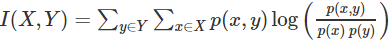<br>
以上就是经典的互信息公式了。想把互信息直接用于特征选择其实不是太方便,<br>
MI其实是一个聚类的评分指标：<br>
1、它不属于度量方式，也没有办法归一化，在不同数据及上的结果无法做比较；<br>
2、对于连续变量的计算不是很方便（X和Y都是集合，x，y都是离散的取值），<br>
通常变量需要先离散化，而互信息的结果对离散化的方式很敏感。<br>

BUT :<br>
    MIC最大信息系数克服了这两个问题(也就是你可以直接使用连续变量，不归一化)。<br>
    它首先寻找一种最优的离散化方式，然后把互信息取值转换成一种度量方式，<br>
    取值区间在[0，1]。minepy提供了MIC功能。<br>

In [3]:
from minepy import MINE  
m = MINE()  
x = np.random.uniform(-1, 1, 10000)  
m.compute_score(x, x**2)  
print('最大最大信息系数MIC为: %.2f' % float(m.mic()))

最大最大信息系数MIC为: 1.00


👀看到了吗，就算是非线性也可以的得到正确值<br>
注意:
    MIC的统计能力遭到了一些质疑，当零假设不成立时(即统计检验时预先建立的假设不成立时)，<br>
    MIC的统计就会受到影响。<br>
    在有的数据集上不存在这个问题，但有的数据集上就存在这个问题。

### 2.3 距离相关系数
距离相关系数是为了克服Pearson相关系数的弱点而生的。<br>
在x和x^2这个例子中，即便Pearson相关系数是0，<br>
我们也不能断定这两个变量是独立的（有可能是非线性相关）；<br>
但如果距离相关系数是0，那么我们就可以说这两个变量是独立的。<br>
这里没有python包，直接github源码

In [19]:
# 地址https://www.snip2code.com/Snippet/1545497/Computes-the-distance-correlation-betwee
# 我自己改了一下输入
"""Computes the distance correlation between two matrices.
https://en.wikipedia.org/wiki/Distance_correlation
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform
__author__ = "Kailash Budhathoki"
__email__ = "kbudhath@mpi-inf.mpg.de"
__copyright__ = "Copyright (c) 2016"
__license__ = "MIT"
def dcov(X, Y):
    """Computes the distance covariance between matrices X and Y.
    """
    n = X.shape[0]
    XY = np.multiply(X, Y)
    cov = np.sqrt(XY.sum()) / n
    return cov
def dvar(X):
    """Computes the distance variance of a matrix X.
    """
    return np.sqrt(np.sum(X ** 2 / X.shape[0] ** 2))
def cent_dist(X):
    """Computes the pairwise euclidean distance between rows of X and centers
     each cell of the distance matrix with row mean, column mean, and grand mean.
    """
    M = squareform(pdist(X))    # distance matrix
    rmean = M.mean(axis=1)
    cmean = M.mean(axis=0)
    gmean = rmean.mean()
    R = np.tile(rmean, (M.shape[0], 1)).transpose()
    C = np.tile(cmean, (M.shape[1], 1))
    G = np.tile(gmean, M.shape)
    CM = M - R - C + G
    return CM
# 主函数dcor
def dcor(X, Y):
    """Computes the distance correlation between two matrices X and Y.

    X and Y must have the same number of rows.

    >>> X = np.matrix('1;2;3;4;5')
    >>> Y = np.matrix('1;2;9;4;4')
    >>> dcor(X, Y)
    0.76267624241686649
    """
    X = np.matrix(np.array(X)).T
    Y = np.matrix(np.array(Y)).T
    assert X.shape[0] == Y.shape[0]

    A = cent_dist(X)
    B = cent_dist(Y)

    dcov_AB = dcov(A, B)
    dvar_A = dvar(A)
    dvar_B = dvar(B)

    dcor = 0.0
    if dvar_A > 0.0 and dvar_B > 0.0:
        dcor = dcov_AB / np.sqrt(dvar_A * dvar_B)

    return dcor

In [24]:
a = [1,2,3,4,5]
b = [1,2,9,4,4]
print('距离系数是: %.2f'% dcor(a, b))

距离系数是: 0.76


尽管有MIC和距离相关系数在了，但当变量之间的关系接近线性相关的时候，<br>
Pearson相关系数仍然是不可替代的。<br>
第一、Pearson相关系数计算速度快，这在处理大规模数据的时候很重要。<br>
第二、Pearson相关系数的取值区间是[-1，1]，而MIC和距离相关系数都是[0，1]。<br>
这个特点使得Pearson相关系数能够表征更丰富的关系，符号表示关系的正负，绝对值能够表示强度。<br>
当然，Pearson相关性有效的前提是两个变量的变化关系是单调的。<br>

### 2.4 基于学习模型的特征排序
这种方法的思路是直接使用你要用的机器学习算法，针对每个单独的特征和响应变量建立预测模型。<br>
其实Pearson相关系数等价于线性回归里的标准化回归系数。假如某个特征和响应变量之间的关系是非线性的，<br>
可以用基于树的方法（决策树、随机森林）、或者扩展的线性模型等。基于树的方法比较易于使用，<br>
因为他们对非线性关系的建模比较好，并且不需要太多的调试。<br>
但要注意过拟合问题，因此树的深度最好不要太大，再就是运用交叉验证。<br>
注意: 树模型天生就可以用来做模型选择(分支节点)

In [33]:
# 为了直观展示，
from sklearn.model_selection import cross_val_score, ShuffleSplit  
from sklearn.datasets import load_boston  
from sklearn.ensemble import RandomForestRegressor  
import pandas as pd
#加载数据
boston = load_boston()  
X = boston["data"]  
Y = boston["target"]  
names = boston["feature_names"]  
data = pd.DataFrame(X, columns=names)
data['target'] = Y
print('让我们看看数据形状,前几列为属性，最后一列target为类标签')
data.head(10)

让我们看看数据形状,前几列为属性，最后一列target为类标签


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [41]:
# 加载随机森林回归模型
rf = RandomForestRegressor(n_estimators=20, max_depth=4)  
scores = []
# 将每个属性得分计算出来(交叉验证可参考cv：http://blog.csdn.net/not_guy/article/details/77652850)
for i in range(data.shape[1]-1):  
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",  
                              cv=ShuffleSplit(len(data), 3, .3))  
     scores.append((round(np.mean(score), 3), data.columns[i]))  
scores = sorted(scores, reverse=True)
print('属性得分分别为:')
for each in scores:
    print(each[1]+' 的得分为: '+str(each[0]) )

属性得分分别为:
RM 的得分为: 0.643
LSTAT 的得分为: 0.636
NOX 的得分为: 0.42
PTRATIO 的得分为: 0.372
TAX 的得分为: 0.323
INDUS 的得分为: 0.32
ZN 的得分为: 0.189
RAD 的得分为: 0.166
CRIM 的得分为: 0.156
B 的得分为: 0.141
CHAS 的得分为: 0.033
AGE 的得分为: 0.015
DIS 的得分为: -0.072


# 3 线性模型和正则化
单变量特征选择方法独立的衡量每个特征与响应变量之间的关系，另一种主流的特征选择方法是基于机器学习模型的方法。<br>
有些机器学习方法本身就具有对特征进行打分的机制，或者很容易将其运用到特征选择任务中，例如回归模型，SVM，决策树，随机森林等等。<br>
说句题外话，这种方法好像在一些地方叫做wrapper类型，大概意思是说，特征排序模型和机器学习模型耦合在一起的，对应的非wrapper类型的特征选择方法叫做filter类型。<br>

下面将介绍如何用回归模型的系数来选择特征。越是重要的特征在模型中对应的系数就会越大，<br>
而跟输出变量越是无关的特征对应的系数就会越接近于0。<br>
在噪音不多的数据上，或者是数据量远远大于特征数的数据上，如果特征之间相对来说是比较独立的，<br>
那么即便是运用最简单的线性回归模型也一样能取得非常好的效果。<br>

In [49]:
# 逻辑回归拟合函数
from sklearn.linear_model import LinearRegression  
import numpy as np  
  
np.random.seed(0)  
size = 5000  
  
#A dataset with 3 features  
X = np.random.normal(0, 1, (size, 3))  
#Y = X0 + 2*X1 + noise  
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)  
lr = LinearRegression()  
lr.fit(X, Y)  

#辅助函数帮助输出系数
def pretty_print_linear(coefs, names = None, sort = False): 
    """
    :param coefs: 系数列表
    :param names: 属性名
    :param sort:  是否按重要度降序排列
    :return: 
    """
    if names == None:  
        names = ["X%s" % x for x in range(len(coefs))]  
    lst = zip(coefs, names)  
    if sort:  
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))  
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)  
print('生成X维度为3，Y = X0 + 2*X1 + noise') 
print ("线性函数拟合结果为:", pretty_print_linear(lr.coef_))  
print('可以看出Y对X0,X1相关性更大, X基本没有相关')

生成X维度为3，Y = X0 + 2*X1 + noise
线性函数拟合结果为: 0.984 * X0 + 1.995 * X1 + -0.041 * X2
可以看出Y对X0,X1相关性更大, X基本没有相关


在这个例子当中，尽管数据中存在一些噪音，但这种特征选择模型仍然能够很好的体现出数据的底层结构。<br>
当然这也是因为例子中的这个问题非常适合用线性模型来解：特征和响应变量之间全都是线性关系，并且特征之间均是独立的。<br>

在很多实际的数据当中，往往存在多个互相关联的特征，这时候模型就会变得不稳定，数据中细微的变化就可能导致模型的巨大变<br>
(模型的变化本质上是系数，或者叫参数，可以理解成W)这会让模型的预测变得困难，这种现象也称为多重共线性.<br>
例如，假设我们有个数据集，它的真实模型应该是Y=X1+X2，当我们观察的时候，发现Y’=X1+X2+e，e是噪音。<br>
如果X1和X2之间存在线性关系，例如X1约等于X2，这个时候由于噪音e的存在，我们学到的模型可能就不是Y=X1+X2了，有可能是Y=2X1，或者Y=-X1+3X2。<br>

from sklearn.linear_model import LinearRegression  
  
size = 100  
np.random.seed(seed=5)  
  
X_seed = np.random.normal(0, 1, size)  
X1 = X_seed + np.random.normal(0, .1, size)  
X2 = X_seed + np.random.normal(0, .1, size)  
X3 = X_seed + np.random.normal(0, .1, size)  
  
Y = X1 + X2 + X3 + np.random.normal(0,1, size)  
X = np.array([X1, X2, X3]).T  
  
lr = LinearRegression()  
lr.fit(X,Y)  
print('真是的函数为:X0+X1+X2+noise')
print ("线性函数拟合结果为:", pretty_print_linear(lr.coef_))  

系数之和接近3，基本上和上上个例子的结果一致，应该说学到的模型对于预测来说还是不错的。<br>
但是，如果从系数的字面意思上去解释特征的重要性的话，X3对于输出变量来说具有很强的正面影响，<br>
而X1具有负面影响，而实际上所有特征与输出变量之间的影响是均等的。<br>

同样的方法和套路可以用到类似的线性模型上，比如逻辑回归。<br>

### 3.1 正则化模型
正则化就是把额外的约束或者惩罚项加到已有模型（损失函数）上，以防止过拟合并提高泛化能力。<br>
损失函数由原来的E(X,Y)变为E(X,Y)+alpha||w||，w是模型系数组成的向量<br>
(有些地方也叫参数parameter，coefficients)，||·||一般是L1或者L2范数，alpha是一个可调的参数，<br>
控制着正则化的强度。当用在线性模型上时，L1正则化和L2正则化也称为Lasso和Ridge。<br>
原理可见:https://charlesliuyx.github.io/2017/10/03/%E3%80%90%E7%9B%B4%E8%A7%82%E8%AF%A6%E8%A7%A3%E3%80%91%E4%BB%80%E4%B9%88%E6%98%AF%E6%AD%A3%E5%88%99%E5%8C%96/

### 3.2 L1正则化/Lasso
L1正则化将系数w的l1范数作为惩罚项加到损失函数上，由于正则项非零，这就迫使那些弱的特征所对应的系数变成0。<br>
因此L1正则化往往会使学到的模型很稀疏（系数w经常为0），这个特性使得L1正则化成为一种很好的特征选择方法。<br>

L1范数是指向量中各个元素绝对值之和，也有个美称叫“稀疏规则算子”（Lasso regularization）。<br>
现在我们来分析下这个价值一个亿的问题：为什么L1范数会使权值稀疏？<br>
有人可能会这样给你回答“它是L0范数的最优凸近似”。实际上，<br>
还存在一个更美的回答：任何的规则化算子，如果他在Wi=0的地方不可微，并且可以分解为一个“求和”的形式，那么这个规则化算子就可以实现稀疏。<br>

来个一句话总结：L1范数和L0范数可以实现稀疏，L1因具有比L0更好的优化求解特性而被广泛应用。<br>
参数稀疏有什么好处呢？这里扯两点：

1）特征选择(Feature Selection)：

       大家对稀疏规则化趋之若鹜的一个关键原因在于它能实现特征的自动选择。一般来说，xi的大部分元素（也就是特征）
       都是和最终的输出yi没有关系或者不提供任何信息的，在最小化目标函数的时候考虑xi这些额外的特征，虽然可以获得更小的训练误差，
       但在预测新的样本时，这些没用的信息反而会被考虑，从而干扰了对正确yi的预测。稀疏规则化算子的引入就是为了完成特征自动选择的光荣使命，
       它会学习地去掉这些没有信息的特征，也就是把这些特征对应的权重置为0。

2）可解释性(Interpretability)：

       另一个青睐于稀疏的理由是，模型更容易解释。例如患某种病的概率是y，然后我们收集到的数据x是1000维的，
       也就是我们需要寻找这1000种因素到底是怎么影响患上这种病的概率的。假设我们这个是个回归模型：y=w1*x1+w2*x2+…+w1000*x1000+b
       （当然了，为了让y限定在[0,1]的范围，一般还得加个Logistic函数）。
       通过学习，如果最后学习到的w*就只有很少的非零元素，例如只有5个非零的wi，
       那么我们就有理由相信，这些对应的特征在患病分析上面提供的信息是巨大的，
       决策性的。也就是说，患不患这种病只和这5个因素有关，那医生就好分析多了。但如果1000个wi都非0，医生面对这1000种因素，累觉不爱。

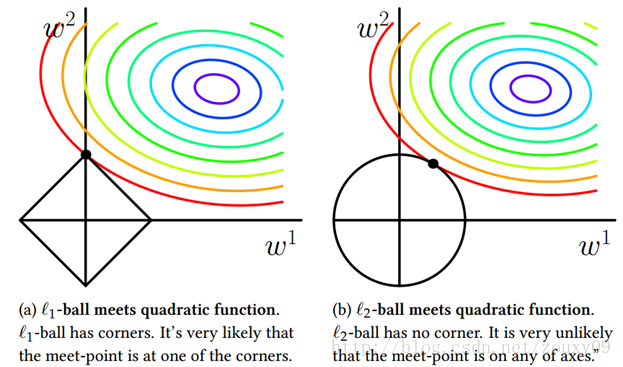<br>
Scikit-learn为线性回归提供了Lasso，为分类提供了L1逻辑回归。<br>

下面的例子在波士顿房价数据上运行了Lasso，其中参数alpha是通过grid search进行优化的。<br>

In [55]:
from sklearn.linear_model import Lasso  
from sklearn.preprocessing import StandardScaler
print('还是上面的那个数据集:')
data.head(5)

还是上面的那个数据集:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
lasso = Lasso(alpha=.3)  
lasso.fit(data.loc[:, :'LSTAT'], data['target'])  
print ("lasso模型选择结果为: ")
print(pretty_print_linear(lasso.coef_, names, sort = True))

lasso模型选择结果为: 
3.092 * RM + -1.04 * DIS + -0.772 * PTRATIO + -0.617 * LSTAT + 0.28 * RAD + -0.091 * CRIM + 0.05 * ZN + -0.018 * INDUS + -0.015 * TAX + 0.01 * B + -0.001 * AGE + 0.0 * CHAS + -0.0 * NOX


/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


可以看到，很多特征的系数都是0。如果继续增加alpha的值，得到的模型就会越来越稀疏，
即越来越多的特征系数会变成0。<br>

然而，L1正则化像非正则化线性模型一样也是不稳定的，如果特征集合中具有相关联的特征，<br>
当数据发生细微变化时也有可能导致很大的模型差异。<br>

### 3.3 L2正则化/Ridge regression
L2正则化将系数向量的L2范数添加到了损失函数中。由于L2惩罚项中系数是二次方的，这使得L2和L1有着诸多差异，
最明显的一点就是，L2正则化会让系数的取值变得平均。对于关联特征，这意味着他们能够获得更相近的对应系数。
还是以Y=X1+X2为例，假设X1和X2具有很强的关联，如果用L1正则化，不论学到的模型是Y=X1+X2还是Y=2X1，
惩罚都是一样的，都是2alpha。但是对于L2来说，第一个模型的惩罚项是2alpha，但第二个模型的是4*alpha。
可以看出，系数之和为常数时，各系数相等时惩罚是最小的，所以才有了L2会让各个系数趋于相同的特点。

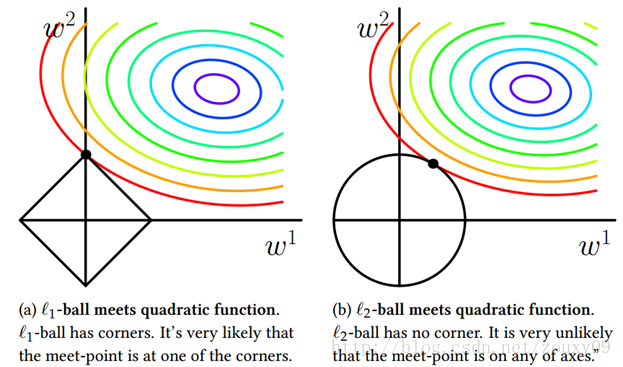<br>
可以看出，L2正则化对于特征选择来说一种稳定的模型，不像L1正则化那样，系数会因为细微的数据变化而波动。
所以L2正则化和L1正则化提供的价值是不同的，L2正则化对于特征理解来说更加有用：表示能力强的特征对应的系数是非零。

可以看到，L1l 与L2的不同就在于L1在和每个坐标轴相交的地方都有“角”出现，而目标函数的测地线除非位置摆得非常好，
大部分时候都会在角的地方相交。注意到在角的位置就会产生稀疏性，例如图中的相交点就有w1=0，而更高维的时候（想象一下三维的L1-ball 是什么样的？）除了角点以外，还有很多边的轮廓也是既有很大的概率成为第一次相交的地方，又会产生稀疏性。

 相比之下，L2 就没有这样的性质，因为没有角，所以第一次相交的地方出现在具有稀疏性的位置的概率就变得非常小了。这就从直观上来解释了为什么L1-regularization 能产生稀疏性，而L2-regularization 不行的原因了。

 因此，一句话总结就是：L1会趋向于产生少量的特征，而其他的特征都是0，而L2会选择更多的特征，这些特征都会接近于0。Lasso在特征选择时候非常有用，而Ridge就只是一种规则化而已。
    
回过头来看看3个互相关联的特征的例子，分别以10个不同的种子随机初始化运行10次，来观察L1和L2正则化的稳定性。

In [71]:
from sklearn.linear_model import Ridge  
from sklearn.metrics import r2_score  
size = 100  
  
#We run the method 10 times with different random seeds  
for i in range(10):  
    print("第 %s 组X和Y" % str(i+1))  
    np.random.seed(seed=i)  
    X_seed = np.random.normal(0, 1, size)  
    X1 = X_seed + np.random.normal(0, .1, size)  
    X2 = X_seed + np.random.normal(0, .1, size)  
    X3 = X_seed + np.random.normal(0, .1, size)  
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)  
    X = np.array([X1, X2, X3]).T  
  
  
    lr = LinearRegression()  
    lr.fit(X,Y)  
    print("逻辑回归参数:", pretty_print_linear(lr.coef_))  
  
    ridge = Ridge(alpha=10)  
    ridge.fit(X,Y)  
    print("岭回归参数:", pretty_print_linear(ridge.coef_))  

第 1 组X和Y
逻辑回归参数: 0.728 * X0 + 2.309 * X1 + -0.082 * X2
岭回归参数: 0.938 * X0 + 1.059 * X1 + 0.877 * X2
第 2 组X和Y
逻辑回归参数: 1.152 * X0 + 2.366 * X1 + -0.599 * X2
岭回归参数: 0.984 * X0 + 1.068 * X1 + 0.759 * X2
第 3 组X和Y
逻辑回归参数: 0.697 * X0 + 0.322 * X1 + 2.086 * X2
岭回归参数: 0.972 * X0 + 0.943 * X1 + 1.085 * X2
第 4 组X和Y
逻辑回归参数: 0.287 * X0 + 1.254 * X1 + 1.491 * X2
岭回归参数: 0.919 * X0 + 1.005 * X1 + 1.033 * X2
第 5 组X和Y
逻辑回归参数: 0.187 * X0 + 0.772 * X1 + 2.189 * X2
岭回归参数: 0.964 * X0 + 0.982 * X1 + 1.098 * X2
第 6 组X和Y
逻辑回归参数: -1.291 * X0 + 1.591 * X1 + 2.747 * X2
岭回归参数: 0.758 * X0 + 1.011 * X1 + 1.139 * X2
第 7 组X和Y
逻辑回归参数: 1.199 * X0 + -0.031 * X1 + 1.915 * X2
岭回归参数: 1.016 * X0 + 0.89 * X1 + 1.091 * X2
第 8 组X和Y
逻辑回归参数: 1.474 * X0 + 1.762 * X1 + -0.151 * X2
岭回归参数: 1.018 * X0 + 1.039 * X1 + 0.901 * X2
第 9 组X和Y
逻辑回归参数: 0.084 * X0 + 1.88 * X1 + 1.107 * X2
岭回归参数: 0.907 * X0 + 1.071 * X1 + 1.008 * X2
第 10 组X和Y
逻辑回归参数: 0.714 * X0 + 0.776 * X1 + 1.364 * X2
岭回归参数: 0.896 * X0 + 0.903 * X1 + 0.98 * X2


可以看出，不同的数据上线性回归得到的模型（系数）相差甚远，但对于L2正则化模型来说，结果中的系数非常的稳定，差别较小，<br>
都比较接近于1，能够反映出数据的内在结构。<br>
比较一下:<br>
第 1 组X和Y <br>
逻辑回归参数: 0.728 * X0 + 2.309 * X1 + -0.082 * X2 <br>
岭回归参数: 0.938 * X0 + 1.059 * X1 + 0.877 * X2 <br>
原函数应该为Y=X0+X1+X2+noise<br>
逻辑回归出现了 多重共线性<br>
而岭回归 相对稳定，而且系数也比较合理<br>

## 4 随机森林
随机森林具有准确率高、鲁棒性好、易于使用等优点，这使得它成为了目前最流行的机器学习算法之一。
随机森林提供了两种特征选择的方法：mean decrease impurity和mean decrease accuracy。

### 4.1 平均不纯度减少
随机森林由多个决策树构成。决策树中的每一个节点都是关于某个特征的条件，为的是将数据集按照不同的响应变量一分为二。<br>
利用不纯度可以确定节点（最优条件），对于分类问题，通常采用基尼不纯度或者信息增益，<br>
对于回归问题，通常采用的是方差或者最小二乘拟合。当训练决策树的时候，可以计算出每个特征减少了多少树的不纯度。<br>
对于一个决策树森林来说，可以算出每个特征平均减少了多少不纯度，并把它平均减少的不纯度作为特征选择的值。<br>

In [95]:
from sklearn.ensemble import RandomForestRegressor  
import numpy as np  
# 还是上面的data数据

rf = RandomForestRegressor()  
for i in range(2):
    rf.fit(data.iloc[:,:-1], data.iloc[:,-1])  
    print ("第 %s 次运行, 各属性得分分别是:" % str(i+1))  
    result = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
    for each in result:
        print(str(each[1]) + ' 的得分为: ' + str(each[0]), end=' ')
    print()
    print()

第 1 次运行, 各属性得分分别是:
RM 的得分为: 0.5296 LSTAT 的得分为: 0.2694 DIS 的得分为: 0.0726 CRIM 的得分为: 0.0377 NOX 的得分为: 0.0299 PTRATIO 的得分为: 0.0175 AGE 的得分为: 0.0144 B 的得分为: 0.0105 TAX 的得分为: 0.0095 INDUS 的得分为: 0.0043 RAD 的得分为: 0.0036 ZN 的得分为: 0.0006 CHAS 的得分为: 0.0005 

第 2 次运行, 各属性得分分别是:
LSTAT 的得分为: 0.4246 RM 的得分为: 0.3821 DIS 的得分为: 0.0539 CRIM 的得分为: 0.0406 NOX 的得分为: 0.0225 PTRATIO 的得分为: 0.0215 AGE 的得分为: 0.0167 TAX 的得分为: 0.014 B 的得分为: 0.0106 INDUS 的得分为: 0.0067 CHAS 的得分为: 0.0041 RAD 的得分为: 0.0015 ZN 的得分为: 0.0014 



上面对数据集运行了两次，可以看出两次运行每个数据的重要度都有变化，第一次运行RM的得分最高，第二次运行LSTAT得分最高<br>
原因: <br>
这里特征得分实际上采用的是Gini Importance。<br>
使用基于不纯度的方法的时候，要记住：1、这种方法存在偏向，对具有更多类别的变量会更有利；<br>
2、对于存在关联的多个特征，其中任意一个都可以作为指示器（优秀的特征），并且一旦某个特征被选择之后，<br>
其他特征的重要度就会急剧下降，因为不纯度已经被选中的那个特征降下来了，其他的特征就很难再降低那么多不纯度了，<br>
这样一来，只有先被选中的那个特征重要度很高，其他的关联特征重要度往往较低。<br>

在理解数据时，这就会造成误解，导致错误的认为先被选中的特征是很重要的，而其余的特征是不重要的，<br>
但实际上这些特征对响应变量的作用确实非常接近的（这跟Lasso是很像的）。<br>

In [103]:
size = 10000  
np.random.seed(seed=10)  
X_seed = np.random.normal(0, 1, size)  
X0 = X_seed + np.random.normal(0, .1, size)  
X1 = X_seed + np.random.normal(0, .1, size)  
X2 = X_seed + np.random.normal(0, .1, size)  
X = np.array([X0, X1, X2]).T  
Y = X0 + X1 + X2  
  
rf = RandomForestRegressor(n_estimators=20, max_features=2)  
rf.fit(X, Y);  
print ("Scores for X0, X1, X2:", list(map(lambda x:round (x,3),rf.feature_importances_)))  

Scores for X0, X1, X2: [0.27200000000000002, 0.54800000000000004, 0.17899999999999999]


特征随机选择方法稍微缓解了这个问题，但总的来说并没有完全解决。<br>
上面的例子中，X0、X1、X2是三个互相关联的变量，在没有噪音的情况下，输出变量是三者之和。<br>
当计算特征重要性时，可以看到X1的重要度比X2的重要度要高出3倍，但实际上他们真正的重要度是一样的。<br>
尽管数据量已经很大且没有噪音，且用了20棵树来做随机选择，但这个问题还是会存在。<br>
需要注意的一点是，关联特征的打分存在不稳定的现象，这不仅仅是随机森林特有的，<br>
大多数基于模型的特征选择方法都存在这个问题。<br>

### 4.2 平均精确率减少
另一种常用的特征选择方法就是直接度量每个特征对模型精确率的影响。<br>
主要思路是打乱每个特征的特征值顺序，并且度量顺序变动对模型的精确率的影响。<br>
很明显，对于不重要的变量来说，打乱顺序对模型的精确率影响不会太大，<br>
但是对于重要的变量来说，打乱顺序就会降低模型的精确率。<br>

In [210]:
from sklearn.cross_validation import ShuffleSplit  
from sklearn.metrics import r2_score  
from collections import defaultdict  
  
rf = RandomForestRegressor()  
scores = defaultdict(list)  
#随机得到索引
for train_idx, test_idx in ShuffleSplit(data.shape[0], 100, .3):  
    X_train, X_test = data.iloc[train_idx, :-1].values, data.iloc[test_idx, :-1].values 
    Y_train, Y_test = data.iloc[train_idx, -1].values, data.iloc[test_idx, -1] .values
    # 训练
    
    r = rf.fit(X_train, Y_train)  
    acc = r2_score(Y_test, rf.predict(X_test))  
    for i in range(X_train.shape[1]):  
        X_t = X_test.copy()  
        np.random.shuffle(X_t[:, i])  
        shuff_acc = r2_score(Y_test, rf.predict(X_t))  
        scores[names[i]].append((acc-shuff_acc)/acc) # 将每一次得到的分数加入字典 
print ("属性得分为:")  
# 计算平均值
result = sorted([(round(np.mean(score), 4), feat) for  
              feat, score in scores.items()], reverse=True)
for each in result:
    print(each[1] + ' 的平均分为: ' + str(each[0]))

属性得分为:
LSTAT 的平均分为: 0.7312
RM 的平均分为: 0.5769
DIS 的平均分为: 0.0865
NOX 的平均分为: 0.0416
CRIM 的平均分为: 0.0401
PTRATIO 的平均分为: 0.0236
TAX 的平均分为: 0.0167
AGE 的平均分为: 0.0119
B 的平均分为: 0.0054
INDUS 的平均分为: 0.0052
RAD 的平均分为: 0.0021
CHAS 的平均分为: 0.0004
ZN 的平均分为: 0.0003


注意:请看代码 (acc-shuff_acc)/acc <br>
如果属性A的顺序对准确度影响很大,则shuff_acc值会在acc的基础上变小，则(acc-shuff_acc)的值会变大<br>
所以最终结果(acc-shuff_acc)/acc 值越大则属性A对Y值影响程度越大，该属性越重要

在这个例子当中，LSTAT和RM这两个特征对模型的性能有着很大的影响，<br>
打乱这两个特征的特征值使得模型的性能下降了73%和57%。<br>
注意，尽管这些我们是在所有特征上进行了训练得到了模型，然后才得到了每个特征的重要性测试，<br>
这并不意味着我们扔掉某个或者某些重要特征后模型的性能就一定会下降很多，因为即便某个特征删掉之后，<br>
其关联特征一样可以发挥作用，让模型性能基本上不变。<br>

## 5 两种顶层特征选择算法
之所以叫做顶层，是因为他们都是建立在基于模型的特征选择方法基础之上的，<br>
例如回归和SVM，在不同的子集上建立模型，然后汇总最终确定特征得分。

### 5.1 稳定性选择 Stability selection
稳定性选择是一种基于二次抽样和选择算法相结合较新的方法，选择算法可以是回归、SVM或其他类似的方法。<br>
它的主要思想是在不同的数据子集和特征子集上运行特征选择算法，不断的重复，最终汇总特征选择结果，<br>
比如可以统计某个特征被认为是重要特征的频率（被选为重要特征的次数除以它所在的子集被测试的次数）。<br>
理想情况下，重要特征的得分会接近100%。稍微弱一点的特征得分会是非0的数，而最无用的特征得分将会接近于0。<br>

In [213]:
# sklearn在随机lasso和随机逻辑回归中有对稳定性选择的实现。
from sklearn.linear_model import RandomizedLasso  
from sklearn.datasets import load_boston  
boston = load_boston()  
  
#using the Boston housing data.   
#Data gets scaled automatically by sklearn's implementation  
X = boston["data"]  
Y = boston["target"]  
names = boston["feature_names"]  
  
rlasso = RandomizedLasso(alpha=0.025)  
rlasso.fit(X, Y)  
  
print ("属性选择得分:")  
result = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_),   
                 names), reverse=True)
for each in result:
    print(each[1] + ' 的平均分为: ' + str(each[0]))

/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


属性选择得分:
RM 的平均分为: 1.0
PTRATIO 的平均分为: 1.0
LSTAT 的平均分为: 1.0
B 的平均分为: 0.68
CHAS 的平均分为: 0.675
TAX 的平均分为: 0.42
CRIM 的平均分为: 0.345
NOX 的平均分为: 0.24
DIS 的平均分为: 0.185
INDUS 的平均分为: 0.145
ZN 的平均分为: 0.05
RAD 的平均分为: 0.025
AGE 的平均分为: 0.015


在上边这个例子当中，最高的3个特征得分是1.0，这表示他们总会被选作有用的特征<br>
（当然，得分会收到正则化参数alpha的影响，但是sklearn的随机lasso能够自动选择最优的alpha）。<br>
接下来的几个特征得分就开始下降，但是下降的不是特别急剧，这跟纯lasso的方法和随机森林的结果不一样。<br>
能够看出稳定性选择对于克服过拟合和对数据理解来说都是有帮助的：<br>
总的来说，好的特征不会因为有相似的特征、关联特征而得分为0，这跟Lasso是不同的。<br>
对于特征选择任务，在许多数据集和环境下，稳定性选择往往是性能最好的方法之一。<br>

## 5.2 递归特征消除 Recursive feature elimination (RFE)
递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型）然后选出最好的（或者最差的）的特征（可以根据系数来选）<br>
，把选出来的特征放到一起，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。<br>
这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。<br>

RFE的稳定性很大程度上取决于在迭代的时候底层用哪种模型。<br>
例如，假如RFE采用的普通的回归，没有经过正则化的回归是不稳定的，那么RFE就是不稳定的；<br>
假如采用的是Ridge，而用Ridge正则化的回归是稳定的，那么RFE就是稳定的。<br>

In [214]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression  
  
boston = load_boston()  
X = boston["data"]  
Y = boston["target"]  
names = boston["feature_names"]  
  
#选择模型，可以使lr也可以是lasso或者其他 
lr = LinearRegression()  
#rank all features, i.e continue the elimination until the last one  
rfe = RFE(lr, n_features_to_select=1)  
rfe.fit(X,Y) 

print ("属性选择得分:")   
result = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_),   
                 names), reverse=True)
for each in result:
    print(each[1] + ' 的平均分为: ' + str(each[0]))

RM 的平均分为: 1.0
PTRATIO 的平均分为: 1.0
LSTAT 的平均分为: 1.0
B 的平均分为: 0.68
CHAS 的平均分为: 0.675
TAX 的平均分为: 0.42
CRIM 的平均分为: 0.345
NOX 的平均分为: 0.24
DIS 的平均分为: 0.185
INDUS 的平均分为: 0.145
ZN 的平均分为: 0.05
RAD 的平均分为: 0.025
AGE 的平均分为: 0.015


# 6 一个完整的比较
下面将本文所有提到的方法进行实验对比，
数据集采用Friedman 1 回归数据（这篇论文中的数据）。数据是用这个公式产生的：<br>
ftp://ftp.uic.edu/pub/depts/econ/hhstokes/e538/Friedman_mars_1991.pdf

X1到X5是由单变量分布生成的，e是标准正态变量N(0,1)。另外，原始的数据集中含有5个噪音变量 X5,…,X10，<br>
跟响应变量是独立的。我们增加了4个额外的变量X11,…X14，分别是X1,…,X4的关联变量，通过f(x)=x+N(0,0.01)生成，<br>
这将产生大于0.999的关联系数。这样生成的数据能够体现出不同的特征排序方法应对关联特征时的表现。<br>

接下来将会在上述数据上运行所有的特征选择方法，并且将每种方法给出的得分进行归一化，让取值都落在0-1之间。对于RFE来<br>说，由于它给出的是顺序而不是得分，我们将最好的5个的得分定为1，其他的特征的得分均匀的分布在0-1之间。<br>



In [218]:

from sklearn.datasets import load_boston  
from sklearn.linear_model import (LinearRegression, Ridge,   
                                  Lasso, RandomizedLasso)  
from sklearn.feature_selection import RFE, f_regression  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.ensemble import RandomForestRegressor  
import numpy as np  
from minepy import MINE  
  
np.random.seed(0)  
  
size = 750  
X = np.random.uniform(0, 1, (size, 14))  
  
#"Friedamn #1” regression problem  
Y = (10 * np.sin(np.pi*X[:,0]*X[:,1]) + 20*(X[:,2] - .5)**2 +  
     10*X[:,3] + 5*X[:,4] + np.random.normal(0,1))  
#Add 3 additional correlated variables (correlated with X1-X3)  
X[:,10:] = X[:,:4] + np.random.normal(0, .025, (size,4))  
  
names = ["x%s" % i for i in range(1,15)]  
  
ranks = {}  
  
def rank_to_dict(ranks, names, order=1):  
    minmax = MinMaxScaler()  
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]  
    ranks = map(lambda x: round(x, 2), ranks)  
    return dict(zip(names, ranks ))  
  
lr = LinearRegression(normalize=True)  
lr.fit(X, Y)  
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)  
  
ridge = Ridge(alpha=7)  
ridge.fit(X, Y)  
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)  
  
  
lasso = Lasso(alpha=.05)  
lasso.fit(X, Y)  
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)  
  
  
rlasso = RandomizedLasso(alpha=0.04)  
rlasso.fit(X, Y)  
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)  
  
#stop the search when 5 features are left (they will get equal scores)  
rfe = RFE(lr, n_features_to_select=5)  
rfe.fit(X,Y)  
ranks["RFE"] = rank_to_dict(list(map(float, rfe.ranking_)), names, order=-1)  
  
rf = RandomForestRegressor()  
rf.fit(X,Y)  
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)  
  
  
f, pval  = f_regression(X, Y, center=True)  
ranks["Corr."] = rank_to_dict(f, names)  
  
mine = MINE()  
mic_scores = []  
for i in range(X.shape[1]):  
    mine.compute_score(X[:,i], Y)  
    m = mine.mic()  
    mic_scores.append(m)  
  
ranks["MIC"] = rank_to_dict(mic_scores, names)  
  
  
r = {}  
for name in names:  
    r[name] = round(np.mean([ranks[method][name]   
                             for method in ranks.keys()]), 2)  
  
methods = sorted(ranks.keys())  
ranks["Mean"] = r  
methods.append("Mean")  
  
result = pd.DataFrame(ranks)
result

/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


,Corr.,Lasso,Linear reg,MIC,Mean,RF,RFE,Ridge,Stability
x1,0.30,0.79,1.00,0.39,0.70,0.55,1.00,0.77,0.77
x10,0.00,0.00,0.01,0.04,0.05,0.00,0.33,0.01,0.00
x11,0.29,0.00,0.60,0.43,0.46,0.39,1.00,0.59,0.37
x12,0.44,0.00,0.14,0.71,0.43,0.35,0.67,0.68,0.47
x13,0.00,0.00,0.48,0.23,0.21,0.07,0.89,0.02,0.00
x14,0.99,0.16,0.00,1.00,0.62,1.00,0.22,0.95,0.62
x2,0.44,0.83,0.56,0.61,0.70,0.67,1.00,0.75,0.72
x3,0.00,0.00,0.50,0.34,0.25,0.13,1.00,0.05,0.00
x4,1.00,1.00,0.57,1.00,0.89,0.56,1.00,1.00,1.00
x5,0.10,0.51,0.27,0.20,0.45,0.29,0.78,0.88,0.55


从以上结果中可以找到一些有趣的发现：

特征之间存在线性关联关系，每个特征都是独立评价的，因此X1,…X4的得分和X11,…X14的得分非常接近，而噪音特征X5,…,X10正如预期的那样和响应变量之间几乎没有关系。由于变量X3是二次的，因此X3和响应变量之间看不出有关系（除了MIC之外，其他方法都找不到关系）。这种方法能够衡量出特征和响应变量之间的线性关系，但若想选出优质特征来提升模型的泛化能力，这种方法就不是特别给力了，因为所有的优质特征都不可避免的会被挑出来两次。

Lasso能够挑出一些优质特征，同时让其他特征的系数趋于0。当如需要减少特征数的时候它很有用，但是对于数据理解来说不是很好用。（例如在结果表中，X11,X12,X13的得分都是0，好像他们跟输出变量之间没有很强的联系，但实际上不是这样的）

MIC对特征一视同仁，这一点上和关联系数有点像，另外，它能够找出X3和响应变量之间的非线性关系。

随机森林基于不纯度的排序结果非常鲜明，在得分最高的几个特征之后的特征，得分急剧的下降。从表中可以看到，得分第三的特征比第一的小4倍。而其他的特征选择算法就没有下降的这么剧烈。

Ridge将回归系数均匀的分摊到各个关联变量上，从表中可以看出，X11,…,X14和X1,…,X4的得分非常接近。

稳定性选择常常是一种既能够有助于理解数据又能够挑出优质特征的这种选择，在结果表中就能很好的看出。像Lasso一样，它能找到那些性能比较好的特征（X1，X2，X4，X5），同时，与这些特征关联度很强的变量也得到了较高的得分。

## 总结
对于理解数据、数据的结构、特点来说，单变量特征选择是个非常好的选择。<br>
尽管可以用它对特征进行排序来优化模型，但由于它不能发现冗余（<br>
例如假如一个特征子集，其中的特征之间具有很强的关联，那么从中选择最优的特征时就很难考虑到冗余的问题）。<br>
正则化的线性模型对于特征理解和特征选择来说是非常强大的工具。<br>
L1正则化能够生成稀疏的模型，对于选择特征子集来说非常有用；<br>
相比起L1正则化，L2正则化的表现更加稳定，由于有用的特征往往对应系数非零，因此L2正则化对于数据的理解来说很合适。<br>
由于响应变量和特征之间往往是非线性关系，可以采用basis expansion的方式将特征转换到一个更加合适的空间当中，在此基础上再考虑运用简单的线性模型。<br>
随机森林是一种非常流行的特征选择方法，它易于使用，一般不需要feature engineering、调参等繁琐的步骤，并且很多工具包都提供了平均不纯度下降方法。<br>
它的两个主要问题，1是重要的特征有可能得分很低（关联特征问题），2是这种方法对特征变量类别多的特征越有利（偏向问题）。<br>
尽管如此，这种方法仍然非常值得在你的应用中试一试。<br>
特征选择在很多机器学习和数据挖掘场景中都是非常有用的。<br>
在使用的时候要弄清楚自己的目标是什么，然后找到哪种方法适用于自己的任务。<br>
当选择最优特征以提升模型性能的时候，可以采用交叉验证的方法来验证某种方法是否比其他方法要好。<br>
当用特征选择的方法来理解数据的时候要留心，特征选择模型的稳定性非常重要，稳定性差的模型很容易就会导致错误的结论。<br>
对数据进行二次采样然后在子集上运行特征选择算法能够有所帮助，如果在各个子集上的结果是一致的，<br>
那就可以说在这个数据集上得出来的结论是可信的，可以用这种特征选择模型的结果来理解数据。<br>

附加: XGBOOST特征选择
数据下载:
    https://www.kaggle.com/c/allstate-claims-severity/data
或者:
    链接: https://pan.baidu.com/s/1nxaHwY9 密码: m2s4

In [220]:
import numpy as np
import pandas as pd
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
# 创建xgb特征map
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

In [234]:
# 读取数据
train = pd.read_csv("train.csv")
print('查看数据大致形状')
train.head(5)

查看数据大致形状


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [235]:
cat_sel = [n for n in train.columns if n.startswith('cat')]  # 类查找cat开头属性，cat开头为标称属性
for column in cat_sel:
    train[column] = pd.factorize(train[column].values, sort=True)[0] + 1 # 标称属性数字化
print('处理后的数据')
train.head(5)

处理后的数据


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,1,2,1,2,1,1,1,1,2,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,1,2,1,1,1,1,1,1,2,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,1,2,1,1,2,1,1,1,2,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,2,2,1,2,1,1,1,1,2,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,1,2,1,2,1,1,1,1,2,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [236]:
# xgb参数
params = {
        'min_child_weight': 100,
        'eta': 0.02,
        'colsample_bytree': 0.7,
        'max_depth': 12,
        'subsample': 0.7,
        'alpha': 1,
        'gamma': 1,
        'silent': 1,
        'verbose_eval': True,
        'seed': 12
    }
rounds = 10 # 迭代次数

In [237]:
y = train['loss'] # 最后一列'loss'是标签
X = train.drop(['loss', 'id'], 1)

In [238]:
xgtrain = xgb.DMatrix(X, label=y)
bst = xgb.train(params, xgtrain, num_boost_round=rounds) # 训练数据

In [240]:
features = X.columns
ceate_feature_map(features)

In [252]:
importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

In [253]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

In [255]:
print('属性重要度排名')
df

属性重要度排名


,feature,fscore
0,cont7,0.087542
1,cont2,0.084175
2,cont14,0.081049
3,cat100,0.051708
4,cont3,0.045455
5,cont12,0.041847
6,cat101,0.035835
7,cont11,0.031025
8,cat103,0.028860
9,cat111,0.023329


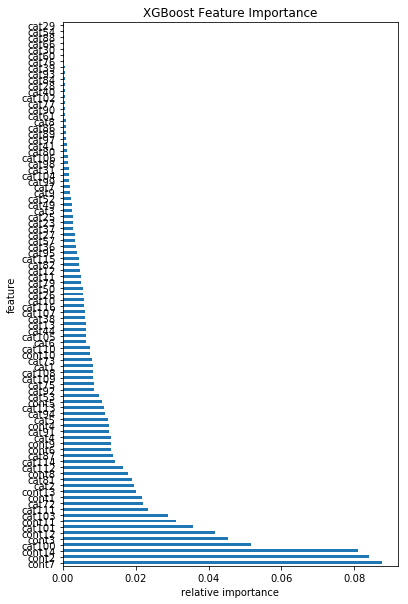

In [256]:
plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))  
plt.title('XGBoost Feature Importance')  
plt.xlabel('relative importance')  
plt.show()  